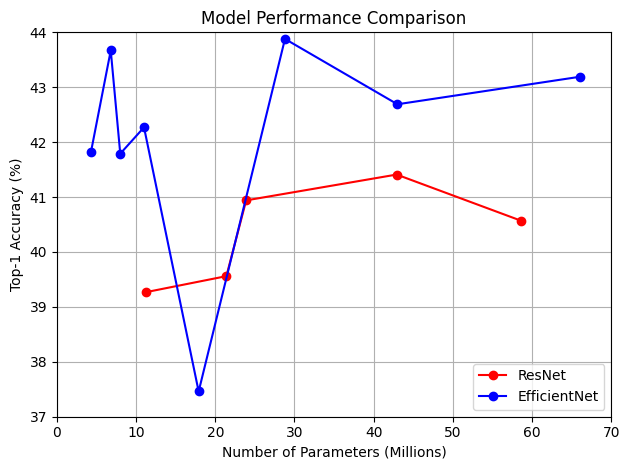

In [10]:
import matplotlib.pyplot as plt

resnet_dict = {
    'resnet18': {
        'params': 11.3,
        'accuracy': 0.3926999866962433 * 100
        },
    'resnet34': {
        'params': 21.4,
        'accuracy': 0.39559999108314514 * 100
        },
    'resnet50': {
        'params': 23.9,
        'accuracy': 0.40939998626708984 * 100
        },
    'resnet101': {
        'params': 42.9,
        'accuracy': 0.4140999913215637 * 100
        },
    'resnet152': {
        'params': 58.6,
        'accuracy': 0.4056999981403351 * 100
        }
}

efficientnet_dict = {
    'efficientnet_b0': {
        'params': 4.3,
        'accuracy': 0.41819998621940613 * 100
        },
    'efficientnet_b1': {
        'params': 6.8,
        'accuracy': 0.4366999864578247 * 100
        },
    'efficientnet_b2': {
        'params': 8.0,
        'accuracy': 0.4178999960422516 * 100
        },
    'efficientnet_b3': {
        'params': 11.0,
        'accuracy': 0.4226999878883362 * 100
        },
    'efficientnet_b4': {
        'params': 17.9,
        'accuracy': 0.37459999322891235 * 100
        },
    'efficientnet_b5': {
        'params': 28.8,
        'accuracy': 0.43880000710487366 * 100
        },
    'efficientnet_b6': {
        'params': 43.0,
        'accuracy': 0.4268999991416931 * 100
        },
    'efficientnet_b7': {
        'params': 66.0,
        'accuracy': 0.43189999437332153 * 100
    }
}

def plot_model_performance(resnet_dict, efficientnet_dict, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Number of Parameters (Millions)')
    ax.set_ylabel('Top-1 Accuracy (%)')
    ax.set_xlim(0, 70)
    ax.set_ylim(37, 44)

    resnet_params = [v['params'] for k, v in resnet_dict.items()]
    resnet_accs = [v['accuracy'] for k, v in resnet_dict.items()]
    ax.plot(resnet_params, resnet_accs, 'o-r', label='ResNet')

    eff_params = [v['params'] for k, v in efficientnet_dict.items()]
    eff_accs = [v['accuracy'] for k, v in efficientnet_dict.items()]
    ax.plot(eff_params, eff_accs, 'o-b', label='EfficientNet')

    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_model_performance(resnet_dict, efficientnet_dict, 'Model Performance Comparison')

Module                    FLOP    % Total
--------------------  --------  ---------
ResNet                297.116M    100.00%
 - aten.convolution   296.092M     99.66%
 - aten.addmm           1.024M      0.34%
 ResNet.conv1          19.268M      6.48%
  - aten.convolution   19.268M      6.48%
 ResNet.layer1         75.497M     25.41%
  - aten.convolution   75.497M     25.41%
 ResNet.layer2         67.109M     22.59%
  - aten.convolution   67.109M     22.59%
 ResNet.layer3         67.109M     22.59%
  - aten.convolution   67.109M     22.59%
 ResNet.layer4         67.109M     22.59%
  - aten.convolution   67.109M     22.59%
 ResNet.fc              1.024M      0.34%
  - aten.addmm          1.024M      0.34%
Module                    FLOP    % Total
--------------------  --------  ---------
ResNet                599.106M    100.00%
 - aten.convolution   598.082M     99.83%
 - aten.addmm           1.024M      0.17%
 ResNet.conv1          19.268M      3.22%
  - aten.convolution   19.268M    

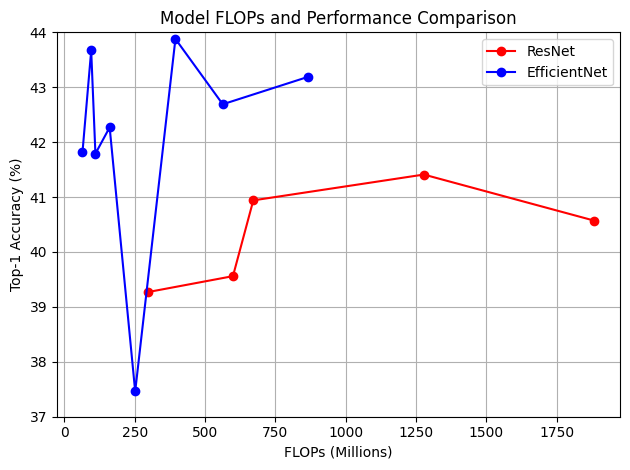

In [12]:
import torch
import torchvision.models as models
from torch.utils.flop_counter import FlopCounterMode

# Function to compute FLOPs
def compute_flops(model, input_size=(1, 3, 64, 64)):
    model.eval()
    dummy_input = torch.randn(input_size)
    flop_counter = FlopCounterMode(model)
    with flop_counter:
        model(dummy_input)
    total_flops = flop_counter.get_total_flops()
    return total_flops / 1e6  # Convert to MFLOPs

# Measure FLOPs for ResNet models
for name in resnet_dict:
    model = getattr(models, name)()
    flops = compute_flops(model)
    resnet_dict[name]['flops'] = flops

# Measure FLOPs for EfficientNet models
for name in efficientnet_dict:
    model = getattr(models, name)(num_classes=200)
    flops = compute_flops(model)
    efficientnet_dict[name]['flops'] = flops

print("ResNet FLOPs:")
for name, metrics in resnet_dict.items():
    print(f"{name}: {metrics['flops']} MFLOPs")


def plot_model_flops_with_performance(resnet_dict, efficientnet_dict, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('FLOPs (Millions)')
    ax.set_ylabel('Top-1 Accuracy (%)')

    ax.set_ylim(37, 44)

    resnet_params = [v['flops'] for k, v in resnet_dict.items()]
    resnet_accs = [v['accuracy'] for k, v in resnet_dict.items()]
    ax.plot(resnet_params, resnet_accs, 'o-r', label='ResNet')

    eff_params = [v['flops'] for k, v in efficientnet_dict.items()]
    eff_accs = [v['accuracy'] for k, v in efficientnet_dict.items()]
    ax.plot(eff_params, eff_accs, 'o-b', label='EfficientNet')

    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    plot_model_flops_with_performance(resnet_dict, efficientnet_dict, 'Model FLOPs and Performance Comparison')
